# A comparative study between five of the seven known coronavirus strains (Human coronavirus 229E (HCoV-229E),Human coronavirus NL63 (HCoV-NL63),Human coronavirus HKU1 (HCoV-HKU1),Middle East respiratory syndrome-related coronavirus (MERS-CoV),and Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2))
in this project we
1. compared the GC contents of all the sequences
2. aligned sars-cov-2 with other four virus strains using dotplot
3. Observed the struture of the respective viral proteins


### Import all the libraries 

In [53]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [54]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [55]:
def dotplotgraph(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

In [56]:
Human_Coronavirus_NL63 = SeqIO.read("C:\\Users\\DSFM\\Downloads\\HumanCoronavirusNL63.fasta","fasta")
Human_coronavirus_229E = SeqIO.read("C:\\Users\\DSFM\\Downloads\\Humancoronavirus229E.fasta","fasta")
Human_coronavirus_HKU1 = SeqIO.read("C:\\Users\\DSFM\Downloads\\HumancoronavirusHKU1.fasta","fasta")
Middle_East_respiratory_syndrome_related_coronavirus = SeqIO.read("C:\\Users\\DSFM\\Downloads\\MiddleEastrespiratorysyndromerelatedcoronavirus.fasta","fasta")
Sars_Covid_2 =SeqIO.read("C:\\Users\\DSFM\\Downloads\\Sars_Covid_2.fasta","fasta")

In [57]:
Human_Coronavirus_NL63

SeqRecord(seq=Seq('CTTAAAGAATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGACTTTGTGT...CAC'), id='NC_005831.2', name='NC_005831.2', description='NC_005831.2 Human Coronavirus NL63, complete genome', dbxrefs=[])

In [58]:
Human_coronavirus_229E

SeqRecord(seq=Seq('ACTTAAGTACCTTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGT...AAA'), id='MT797634.1', name='MT797634.1', description='MT797634.1 Human coronavirus 229E isolate HK20-42, complete genome', dbxrefs=[])

In [59]:
Human_coronavirus_HKU1

SeqRecord(seq=Seq('GATTGACGTTCGTACCGTCTATCAGCTTACGATCTCTTGTCAGATCTCATTAAA...TAC'), id='MH940245.1', name='MH940245.1', description='MH940245.1 Human coronavirus HKU1 isolate SI17244, complete genome', dbxrefs=[])

In [60]:
Middle_East_respiratory_syndrome_related_coronavirus

SeqRecord(seq=Seq('ATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACG...AAA'), id='MK967708.1', name='MK967708.1', description='MK967708.1 Middle East respiratory syndrome-related coronavirus isolate Merscov/Egypt/Camel/AHRI-FAO-1/2018, complete genome', dbxrefs=[])

In [61]:
Sars_Covid_2

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [62]:
print("Human_Coronavirus_NL63_seq ::",len(Human_Coronavirus_NL63.seq))
print("Human_coronavirus_229E_seq ::",len(Human_coronavirus_229E.seq))
print("Human_coronavirus_HKU1_seq ::",len(Human_coronavirus_HKU1.seq))
print("Middle_East_respiratory_syndrome_related_coronavirus_seq ::",len(Middle_East_respiratory_syndrome_related_coronavirus.seq))
print("Sars_Covid_2_seq ::",len(Sars_Covid_2.seq))

Human_Coronavirus_NL63_seq :: 27553
Human_coronavirus_229E_seq :: 27261
Human_coronavirus_HKU1_seq :: 29811
Middle_East_respiratory_syndrome_related_coronavirus_seq :: 30106
Sars_Covid_2_seq :: 29903


In [63]:
print("GC content of Human_Coronavirus_NL63_seq = ",GC(Human_Coronavirus_NL63.seq))
print("GC content of Human_coronavirus_229E_seq = ",GC(Human_coronavirus_229E.seq))
print("GC content of Human_coronavirus_HKU1_seq = ",GC(Human_coronavirus_HKU1.seq))
print("GC content of Middle_East_respiratory_syndrome_related_coronavirus_seq = ",GC(Middle_East_respiratory_syndrome_related_coronavirus.seq))
print("GC content of Sars_Covid_2_seq = ",GC(Sars_Covid_2.seq))

GC content of Human_Coronavirus_NL63_seq =  34.46085725692302
GC content of Human_coronavirus_229E_seq =  38.054363376251786
GC content of Human_coronavirus_HKU1_seq =  32.01502800979504
GC content of Middle_East_respiratory_syndrome_related_coronavirus_seq =  41.17451670763303
GC content of Sars_Covid_2_seq =  37.97277865097148


In [64]:
Human_Coronavirus_NL63_protein = Human_Coronavirus_NL63.seq.translate()
Human_coronavirus_229E_protein = Human_coronavirus_229E.seq.translate()
Human_coronavirus_HKU1_protein = Human_coronavirus_HKU1.seq.translate()
Middle_East_respiratory_syndrome_related_coronavirus_protein = Middle_East_respiratory_syndrome_related_coronavirus.seq.translate()
Sars_Covid_2_protein = Sars_Covid_2.seq.translate()

D:\New folder (2)\lib\site-packages\Bio\Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [65]:
print("Human_Coronavirus_NL63_protein = ",len(Human_Coronavirus_NL63_protein))
print("Human_coronavirus_229E_protein = ",len(Human_coronavirus_229E_protein))
print("Human_coronavirus_HKU1_protein = ",len(Human_coronavirus_HKU1_protein))
print("Middle_East_respiratory_syndrome_related_coronavirus_protein = ",len(Middle_East_respiratory_syndrome_related_coronavirus_protein))
print("Sars_Covid_2_protein = ",len(Sars_Covid_2_protein))

Human_Coronavirus_NL63_protein =  9184
Human_coronavirus_229E_protein =  9087
Human_coronavirus_HKU1_protein =  9937
Middle_East_respiratory_syndrome_related_coronavirus_protein =  10035
Sars_Covid_2_protein =  9967


In [66]:
from collections import Counter

In [67]:
Human_Coronavirus_NL63_AA_count = Counter(Human_Coronavirus_NL63_protein)
Human_coronavirus_229E_AA_count = Counter(Human_coronavirus_229E_protein)
Human_coronavirus_HKU1_AA_count = Counter(Human_coronavirus_HKU1_protein)
Middle_East_respiratory_syndrome_related_coronavirus_AA_count = Counter(Middle_East_respiratory_syndrome_related_coronavirus_protein)
Sars_Covid_2_AA_count = Counter(Sars_Covid_2_protein)

<BarContainer object of 21 artists>

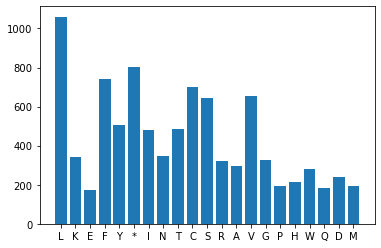

In [68]:
plt.bar(Human_Coronavirus_NL63_AA_count.keys(), Human_Coronavirus_NL63_AA_count.values())

<BarContainer object of 21 artists>

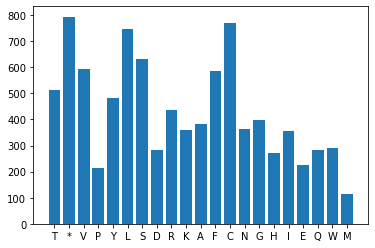

In [69]:
plt.bar(Human_coronavirus_229E_AA_count.keys(), Human_coronavirus_229E_AA_count.values())

<BarContainer object of 21 artists>

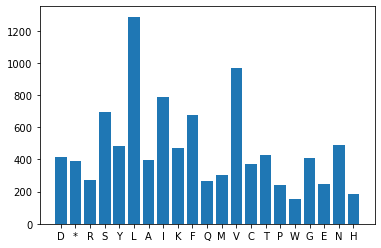

In [70]:
plt.bar(Human_coronavirus_HKU1_AA_count.keys(), Human_coronavirus_HKU1_AA_count.values())

<BarContainer object of 21 artists>

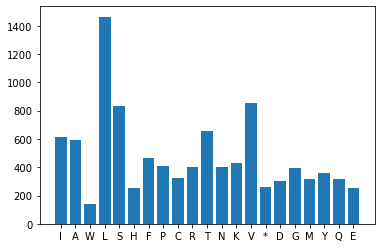

In [71]:
plt.bar(Middle_East_respiratory_syndrome_related_coronavirus_AA_count.keys(), Middle_East_respiratory_syndrome_related_coronavirus_AA_count.values())

<BarContainer object of 21 artists>

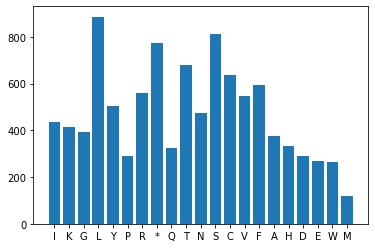

In [72]:
plt.bar(Sars_Covid_2_AA_count.keys(), Sars_Covid_2_AA_count.values())

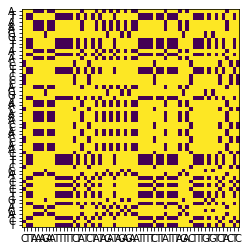

In [73]:
dotplotgraph(Sars_Covid_2.seq[0:60],Human_Coronavirus_NL63.seq[0:60])

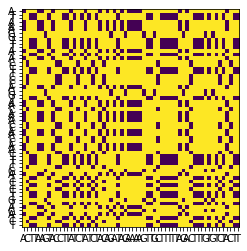

In [74]:
dotplotgraph(Sars_Covid_2.seq[0:60], Human_coronavirus_229E.seq[0:60])

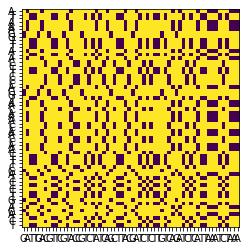

In [75]:
dotplotgraph(Sars_Covid_2.seq[0:60], Human_coronavirus_HKU1.seq[0:60])

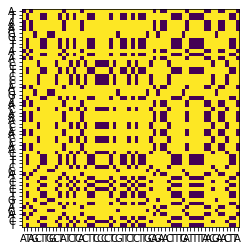

In [76]:
dotplotgraph(Sars_Covid_2.seq[0:60], Middle_East_respiratory_syndrome_related_coronavirus.seq[0:60])

In [77]:
Sars_Covid_2_and_Human_Coronavirus_NL63_alighnment = pairwise2.align.globalxx(Sars_Covid_2.seq[0:100],Human_Coronavirus_NL63.seq[0:100],one_alignment_only=True,score_only=True)
Sars_Covid_2_and_Human_coronavirus_229E_alighnment = pairwise2.align.globalxx(Sars_Covid_2.seq[0:100],Human_coronavirus_229E.seq[0:100],one_alignment_only=True,score_only=True)
Sars_Covid_2_and_Human_coronavirus_HKU1_alighnment = pairwise2.align.globalxx(Sars_Covid_2.seq[0:100],Human_coronavirus_HKU1.seq[0:100],one_alignment_only=True,score_only=True)
Sars_Covid_2_and_Middle_East_respiratory_syndrome_related_coronavirus_alighnment = pairwise2.align.globalxx(Sars_Covid_2.seq[0:100],Middle_East_respiratory_syndrome_related_coronavirus.seq[0:100],one_alignment_only=True,score_only=True)

In [78]:
Sars_Covid_2_and_Human_Coronavirus_NL63_alighnment

68.0

In [79]:
Sars_Covid_2_and_Human_coronavirus_229E_alighnment

70.0

In [80]:
Sars_Covid_2_and_Human_coronavirus_HKU1_alighnment

68.0

In [81]:
Sars_Covid_2_and_Middle_East_respiratory_syndrome_related_coronavirus_alighnment

68.0

In [82]:
from Bio.PDB import PDBParser,MMCIFParser

In [83]:
parser = PDBParser()

In [84]:
Sars_Covid_2_structure = parser.get_structure("6vxx", "C:\\Users\\DSFM\\Downloads\\6vxx.pdb")
Human_coronavirus_229E_structure = parser.get_structure("6u7h", "C:\\Users\\DSFM\\Downloads\\6u7h.pdb")
Human_Coronavirus_NL63_structure = parser.get_structure("2ieq", "C:\\Users\\DSFM\\Downloads\\2ieq.pdb")
Middle_East_respiratory_syndrome_related_coronavirus_structure = parser.get_structure("6kl2", "C:\\Users\\DSFM\\Downloads\\6kl2.pdb")

D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25394.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25548.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25702.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24426.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24580.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24734.
  warnings.warn(
D:\New folder (2)\lib\site-packages\Bio\PDB\Structur

In [85]:
! pip install nglview 

In [86]:
import nglview as nv

In [87]:
nv.demo()

NGLWidget()

In [88]:
view_Sars_Covid_2_structure =  nv.show_biopython(Sars_Covid_2_structure)

In [89]:
view_Sars_Covid_2_structure

NGLWidget()

In [90]:
view_Human_Coronavirus_NL63_structure =  nv.show_biopython(Human_Coronavirus_NL63_structure)

In [91]:
view_Human_Coronavirus_NL63_structure

NGLWidget()

In [92]:
view_Human_coronavirus_229E_structure =  nv.show_biopython(Human_coronavirus_229E_structure)

In [93]:
view_Human_coronavirus_229E_structure

NGLWidget()

In [94]:
view_Middle_East_respiratory_syndrome_related_coronavirus_structure =  nv.show_biopython(Middle_East_respiratory_syndrome_related_coronavirus_structure)

In [95]:
view_Middle_East_respiratory_syndrome_related_coronavirus_structure

NGLWidget()